In [1]:
# This changes the current directory to the base saga directory - make sure to run this first!
# This is necessary to be able to import the py files and use the right directories,
# while keeping all the notebooks in their own directory.
import os
import sys

if 'saga_base_dir' not in locals():
    saga_base_dir = os.path.abspath('..')
if saga_base_dir not in sys.path:
    os.chdir(saga_base_dir)

In [2]:
import numpy as np

from astropy import units as u
from astropy.coordinates import Distance
from astropy.table import Table
from astropy.io import fits

%matplotlib inline
from matplotlib import rcParams
from matplotlib import pyplot as plt

import targeting

In [3]:
clean = Table.read('SAGADropbox/data/saga_spectra_clean_jan15.fits.gz')
dirty = Table.read('SAGADropbox/data/saga_spectra_dirty_jan15.fits.gz')
sats = clean[clean['SATS']==1]
sats.show_in_notebook(display_length=5)

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,SATURATED,BAD_COUNTS_ERROR,BINNED1,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,Column1,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR,W1,W1ERR,W2,W2ERR,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_NSAID,HOST_FLAG,HOST_SAGA_NAME,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SATS,PROBABILITY_CLASS1,RESCALED_PROBABILITY_CLASS1,REMOVE,TELNAME,MASKNAME,ZQUALITY,SPECOBJID,SPEC_REPEAT
1237655693015056396,224.532617519,-1.31259609568,3,GALAXY,35253360398352,262144,0,268435456,17.3497,16.089,15.4546,15.1464,14.9615,0.0416732,0.00498512,0.00534471,0.00545955,0.0135447,0.0416732,0.00498512,0.00534471,0.00545955,0.0135447,0.32708,0.240662,0.174548,0.132355,0.0938412,17.1418,15.8741,15.3876,15.0828,14.9173,12.9075,13.4682,13.1628,13.8231,13.8238,0.738636,0.710056,0.803463,0.78797,0.894669,21.15,3.11296,24.4211,0.411017,23.5287,0.513989,23.8198,0.408222,24.1926,1.04576,0.449992,0.465957,0.446009,0.475622,0.467311,17.477,0.0415375,16.0842,0.00498177,15.5622,0.00534471,15.1929,0.00545646,15.0088,0.0135404,21.1691,0.0788425,19.6741,0.0184681,19.4228,0.0195905,19.0933,0.019701,18.8251,0.037165,20.6698,0.0618124,19.3683,0.0111833,18.7532,0.0087296,18.4167,0.00977192,18.174,0.0217943,0.0,0.0,0.0,0.0,0.0,0.0862015,-0.015842,0.139541,-0.0327954,0.14517,-0.0385242,0.135794,-0.034536,0.133919,-0.0334079,0.508928,8.21412,149.518,0.479386,8.81146,151.674,0.473689,8.55776,152.901,0.487392,8.70547,151.876,0.495454,8.42529,152.167,19.5874,0.0125185,15.5622,0.00534471,8.55776,6.02391,13.3899,15.5966,22.2194214691,21.4913916271,15.174,9999.0,15.71,0.248,14.45,9999.0,0.0064927,2.15047e-05,0,0.067474,0.016437,-1.0,-1.0,-1.0,-1.0,224.594,-1.09102,28.4038,1922.0,7.693,145729,0,,13.7934861167,113.96603527,35536,1,0.559135409723,0.691219228277,-1,NSA,sdss,4,1.23765569302e+18,NSA
1237648702984683605,225.005401226,-1.09130226734,3,GALAXY,1161121054724696,0,0,268435456,16.0611,15.3154,14.9987,14.8723,14.7438,0.00790307,0.00274512,0.00320407,0.00445661,0.00904204,0.00790307,0.00274512,0.00320407,0.00445661,0.00904204,0.327712,0.241128,0.174886,0.132611,0.0940226,15.997,15.1689,14.8268,14.7113,14.6349,40.986,12.9685,13.7948,14.3383,13.7471,1.52479,0.171283,0.158666,0.162538,0.28877,10.7435,0.29789,14.1078,0.139925,15.0666,0.189859,16.1199,0.217477,19.1789,0.55349,0.763178,0.837018,0.889757,0.903721,0.889412,16.1489,0.00772101,15.3572,0.00280809,14.9363,0.00327976,14.7643,0.00451928,14.6683,0.00921106,18.9691,0.0220671,18.7247,0.0217491,18.3088,0.0183036,18.6214,0.0184466,18.4012,0.0271797,18.6917,0.0133083,18.1511,0.00473336,17.9322,0.00489516,17.876,0.00606622,17.7374,0.015826,0.707669,0.186364,0.135334,0.0759754,0.0475266,0.049303,0.0401041,0.0350942,0.0156222,0.021055,0.00853904,0.0190857,0.00764772,0.0257252,0.000878967,0.766903,4.61793,19.3252,0.859923,6.01446,14.5641,0.9152,6.17972,15.5966,0.893827,6.821,16.

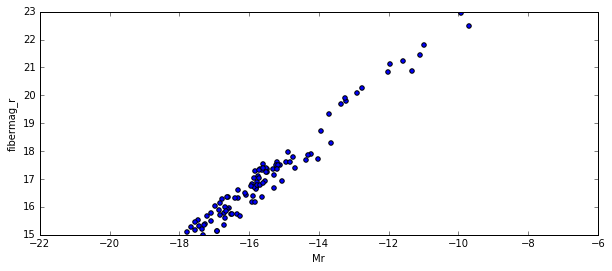

In [4]:
plt.figure(figsize=(10,4))
dists = Distance(sats['HOST_DIST']*u.Mpc)
Mr = sats['CMODELMAG_R'] - dists.distmod.value
plt.scatter(Mr, sats['PETROMAG_R'])


plt.ylim(15,23)
plt.ylabel('fibermag_r')
plt.xlabel('Mr')

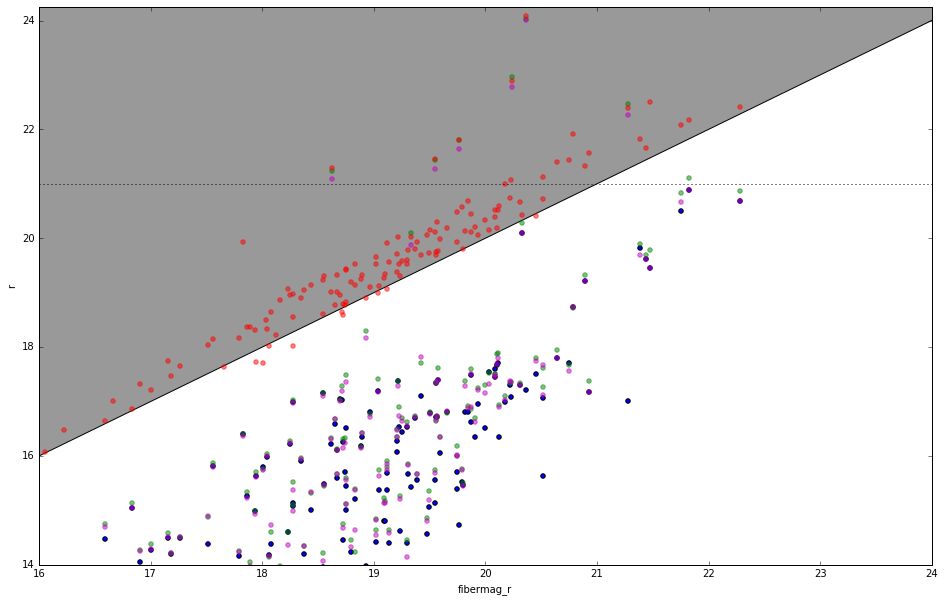

In [5]:
plt.figure(figsize=(16,10))

fiblim = (16, 24)
totlim = (14, 24.25)

#this plot matches the dSph_at_distance_plots plots

x1t1 = [min(fiblim[0], totlim[0]), max(fiblim[1], totlim[1])]
plt.fill_between(x1t1,x1t1, totlim[1],facecolor=[0.6]*3)
plt.axhline(21, c='k', ls=':')

plt.scatter(sats['FIBERMAG_R'], sats['r'])
plt.scatter(sats['FIBERMAG_R'], sats['PETROMAG_R'],color='g', alpha=.5)
plt.scatter(sats['FIBERMAG_R'], sats['CMODELMAG_R'],color='m', alpha=.5)
plt.scatter(sats['FIBERMAG_R'], sats['PSFMAG_R'],color='r', alpha=.5)
plt.xlim(*fiblim)
plt.ylim(*totlim)

plt.xlabel('fibermag_r')
plt.ylabel('r')

Why are there some points with *brighter* fibermag than other mags??

In [6]:
msk = sats['FIBERMAG_R']<sats['CMODELMAG_R']

In [7]:
print targeting.sampled_imagelist(sats[msk], None)

name ra dec
0 195.105563951 13.6705858419
1 247.84002995 20.1840758135
2 217.700609655 3.79639167904
3 222.900268358 58.9548243013
4 354.350599991 0.390802769345
5 139.44430792 53.2935206629
6 175.563531091 36.2980602831


In [8]:
print targeting.sampled_imagelist(sats[~msk], None)

name ra dec
0 335.97997618 -3.27054858631
1 219.190054522 51.4603182194
2 194.572104136 14.5571518823
3 193.358416186 8.03555517632
4 247.877387573 20.0936248407
5 348.874199097 4.61326147472
6 158.04324634 28.4830569538
7 145.234531834 5.04491110503
8 158.712397798 28.6638533288
9 198.263623171 23.084589958
10 255.1878771 23.0439876547
11 207.096719393 43.7086510615
12 141.450424263 34.2768708872
13 139.189595559 53.4429759655
14 141.141087343 34.6588051715
15 218.707391806 54.5344285066
16 180.29544216 -1.2976838319
17 141.021441102 34.6469717218
18 169.611132968 45.6898826245
19 154.228523279 58.394558724
20 138.03939192 35.5266940146
21 182.990666509 20.0278486922
22 20.5363426909 17.5281428748
23 171.11620079 39.814084535
24 162.705990064 28.0587029336


Nothing particular weird... what gives?